In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [3]:
# Data Preparation

In [4]:
Fs = 52
# we are going to divide the data into windows of 2.5 secs
time_steps = int(Fs*(2.5)) # 130
overlap_size = int((Fs*(2.5))/2) # 65

In [5]:
def prepare_windows(df, time_steps, overlap_size):

    N_FEATURES = 3

    windows = []
    labels = []
    for i in range(0, len(df) - time_steps, overlap_size):
        x = df['x'].values[i: i + time_steps]
        y = df['y'].values[i: i + time_steps]
        z = df['z'].values[i: i + time_steps]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + time_steps])[0][0]
        windows.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    windows = np.asarray(windows).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return windows, labels

In [6]:
csv_location = "Processed CSV 3/CSV_processed.csv"
df = pd.read_csv(csv_location, index_col=[0])
df.head()

,x,y,z,label
0,-4.370355,-1.913248,1.743836,0
1,-2.881319,-3.688340,0.599326,0
2,-3.386688,-5.115862,-0.923089,0
3,-3.476933,-5.339300,-1.732884,0
4,-3.097906,-5.016556,-1.214615,0


In [9]:
df.shape

(332451, 4)

In [7]:
X, Y = prepare_windows(df, time_steps, overlap_size)

In [8]:
X.shape, Y.shape

((5113, 130, 3), (5113,))

In [10]:
# Splitting dataset into training and testing data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [12]:
X_train.shape, X_test.shape

((3579, 130, 3), (1534, 130, 3))

In [13]:
X_train[0].shape, X_test[0].shape

((130, 3), (130, 3))

In [14]:
X_train = X_train.reshape(3579, 130, 3, 1)
X_test = X_test.reshape(1534, 130, 3, 1)

In [15]:
X_train.shape, X_test.shape

((3579, 130, 3, 1), (1534, 130, 3, 1))

In [16]:
# Model preparation using tensorflow keras library

In [18]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 50, validation_data= (X_test, Y_test), verbose=1)

Train on 3579 samples, validate on 1534 samples
Epoch 1/50
3579/3579 [==============================] - 2s 536us/sample - loss: 1.3864 - acc: 0.4985 - val_loss: 1.1469 - val_acc: 0.6245
Epoch 2/50
3579/3579 [==============================] - 2s 460us/sample - loss: 1.1379 - acc: 0.5842 - val_loss: 0.9736 - val_acc: 0.6838
Epoch 3/50
3579/3579 [==============================] - 2s 464us/sample - loss: 0.9985 - acc: 0.6432 - val_loss: 0.9121 - val_acc: 0.6923
Epoch 4/50
3579/3579 [==============================] - 2s 467us/sample - loss: 0.9274 - acc: 0.6695 - val_loss: 0.8519 - val_acc: 0.7288
Epoch 5/50
3579/3579 [==============================] - 2s 473us/sample - loss: 0.8507 - acc: 0.6901 - val_loss: 0.7845 - val_acc: 0.7288
Epoch 6/50
3579/3579 [==============================] - 2s 488us/sample - loss: 0.7956 - acc: 0.7125 - val_loss: 0.7831 - val_acc: 0.7295
Epoch 7/50
3579/3579 [==============================] - 2s 511us/sample - loss: 0.7821 - acc: 0.7117 - val_loss: 0.7536 - va

In [20]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

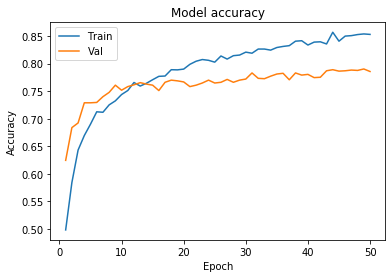

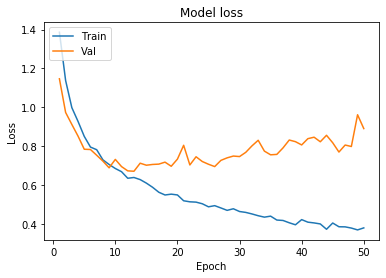

In [21]:
plot_learningCurve(history, 50)

In [ ]:
# model.save_weights('model.h5')